# Lab 8 - PCC177/BCC406

## REDES NEURAIS E APRENDIZAGEM EM PROFUNDIDADE

## Modelos Generativos

### Prof. Eduardo e Prof. Pedro

Objetivos:

- Parte I : Compressão com AE

- Parte II : Detecção de anomalias

- Parte III: Redes Generativas Adversariais

Data da entrega : 12/12/23

- Complete o código (marcado com ToDo) e quando requisitado, escreva textos diretamente nos notebooks. Onde tiver *None*, substitua pelo seu código.
- Execute todo notebook e salve tudo em um PDF **nomeado** como "NomeSobrenome-Lab.pdf"
- Envie o PDF via google [FORM](https://forms.gle/SyQggcn7S2xQaMud9)

Este notebook é baseado em tensorflow e Keras.


# Parte I: Autoencoder para redução de dimensionalidade (30pt)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

Carrega dataset Fashon MNIST dataset.
Cada imagem tem resolução 28x28 pixels.

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


## Exemplo de classes
![mnist fashion](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/intro_autoencoder_result.png?raw=1)




Abaixo exemplo de implementação de autoencoder apena com camadas densas. O  `encoder`, comprime as imegns em 4 dimensões (latent_dim), e o `decoder` reconstróe a imagem a partir do vetor latente.

O exemplo abaixo usa a [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models).

In [ ]:
latent_dim = 4

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 19s 6ms/step - loss: 0.0507 - val_loss: 0.0379
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0354 - val_loss: 0.0338
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0333 - val_loss: 0.0331
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0329 - val_loss: 0.0326
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0327 - val_loss: 0.0325
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0326 - val_loss: 0.0325
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0325 - val_loss: 0.0324
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0325 - val_loss: 0.0326
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0325 - val_loss: 0.0325
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0



Treine o modelo e veja os resultados da re-construção.

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

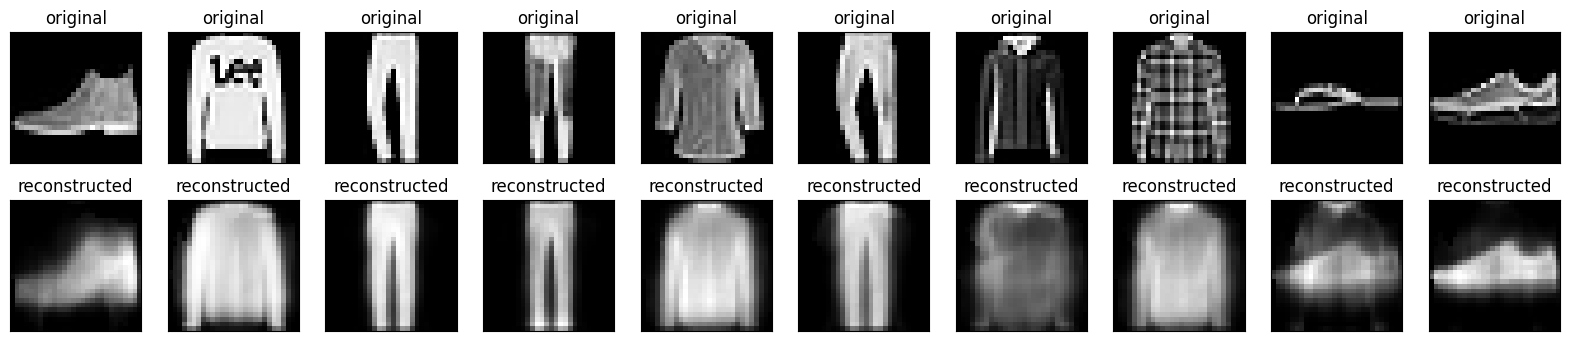

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## ToDo : Testes (15pt)

Faça testes com vetor latente de dimensões 2, 8, 16 e 64.


Training Autoencoder with Latent Dimension: 2
Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0697 - val_loss: 0.0586
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0551 - val_loss: 0.0511
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0487 - val_loss: 0.0465
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0455 - val_loss: 0.0449
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0446 - val_loss: 0.0443
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0444 - val_loss: 0.0442
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0443 - val_loss: 0.0441
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0442 - val_loss: 0.0441
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0442 - val_loss: 0.0441
Epoch 10/10
1875/1875 [==========


Training Autoencoder with Latent Dimension: 8
Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.0397 - val_loss: 0.0269
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0249 - val_loss: 0.0239
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0236 - val_loss: 0.0234
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0233 - val_loss: 0.0233
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0232 - val_loss: 0.0232
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0231 - val_loss: 0.0231
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0231 - val_loss: 0.0231
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0230 - val_loss: 0.0230
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0230 - val_loss: 0.0230
Epoch 10/10
1875/1875 [============


Training Autoencoder with Latent Dimension: 16
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0345 - val_loss: 0.0218
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0199 - val_loss: 0.0190
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0187 - val_loss: 0.0185
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0182 - val_loss: 0.0178
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0178 - val_loss: 0.0177
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0176 - val_loss: 0.0177
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0176 - val_loss: 0.0176
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0175 - val_loss: 0.0175
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0175 - val_loss: 0.0177
Epoch 10/10
1875/1875 [===========

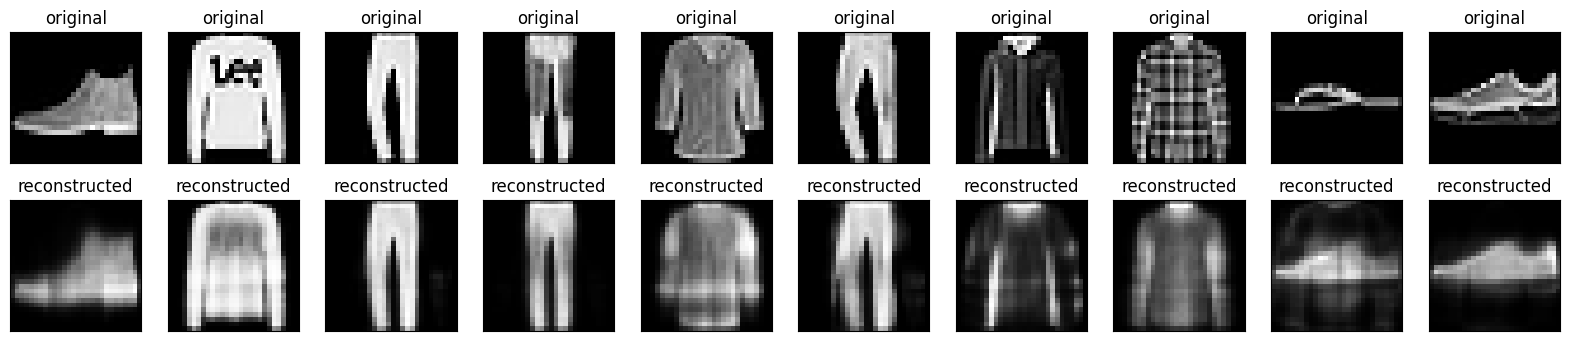


Training Autoencoder with Latent Dimension: 64
Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0233 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0094 - val_loss: 0.0096
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [=========

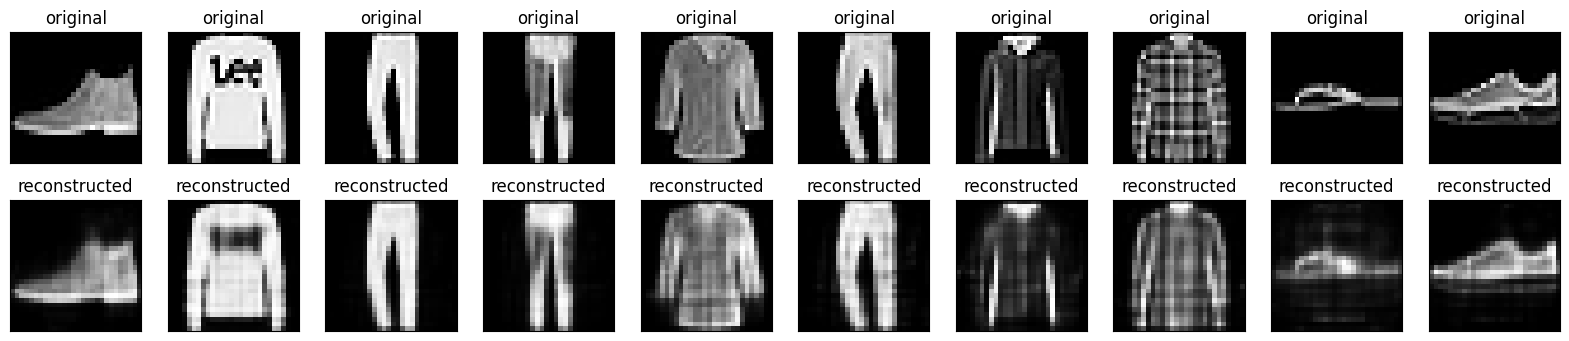

In [ ]:
# Function to create and train the autoencoder
def train_autoencoder(latent_dim):
    autoencoder = Autoencoder(latent_dim)
    autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
    autoencoder.fit(x_train, x_train,
                    epochs=10,
                    shuffle=True,
                    validation_data=(x_test, x_test))
    return autoencoder

# Function to display original and reconstructed images
def display_original_reconstructed(autoencoder, x_test):
    encoded_imgs = autoencoder.encoder(x_test).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i])
        plt.title("original")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.title("reconstructed")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Test the autoencoder with different latent dimensions
latent_dimensions = [2, 8, 16, 64]

for latent_dim in latent_dimensions:
    print(f"\nTraining Autoencoder with Latent Dimension: {latent_dim}")
    autoencoder = train_autoencoder(latent_dim)
    display_original_reconstructed(autoencoder, x_test)


## ToDo : Responda (15pt)

Escreva suas conclusões sobre os testes executados

As the latent dimension increases, the model tends to capture more complex features and details in the data.
However, increasing the latent dimension significantly may lead to overfitting, especially if the dataset is not large enough.
The trade-off between the dimensionality of the latent space and the quality of reconstruction needs to be considered.
It's essential to choose a latent dimension that balances representation power and model simplicity.

# Parte II: Detecção de anomalias (30pt)


## Intro

Neste exemplo, você vai detectar anomalis em sinaos de eletrocardiograma (ECG). Para tal, treine um autoencoder no dataset [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). Este dataset contém 5000 batimentos de ECG (https://en.wikipedia.org/wiki/Electrocardiography), cada um com 140 amostras (pontos) na curva. Cada instância da base de dados (um batimento) foi rotulado como zero (0) ou um (1). A classe zero corresponde a um batimento anormal e a classe um a um batimento de classe normal. Queremos identificar os anormais.

Para detectar anomalias usando um autoencoder você deve treinar um autoencoder apenas em batimentos normais. Ele vai aprender a re-construir os batimentos saudáveis. A hipóteses é que os batimentos anormais vão divergir no padrão, quando compararmos a entrada com a re-construção.

## Carrega base de ECG

Base de dados detalhada no site: [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [ ]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136       137       138       139  140  
0  0.257740  0.228077  0.123431  0.925286  0.193137  1.0  
1  0.555784  0.476333  0.773820  1.119621 -1.436250  1.0  
2 -0.713683 -0.532197  0.321097  0.904227 -0.421797  1.0  
3  0.952074  0.990133  1.086798  1.403011 -0.383564  1.0  
4  1.277392  0.960304  0.971020  1.614392  1.421456  1.0  

[5 rows x 141 columns]

In [ ]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normaliza entre `[0,1]`.


In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

Vamos separar os batimentos normais (label 1) para treinar o Autoencoder.

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Plote um batimento normal.

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

Plote um batimento anômalo.

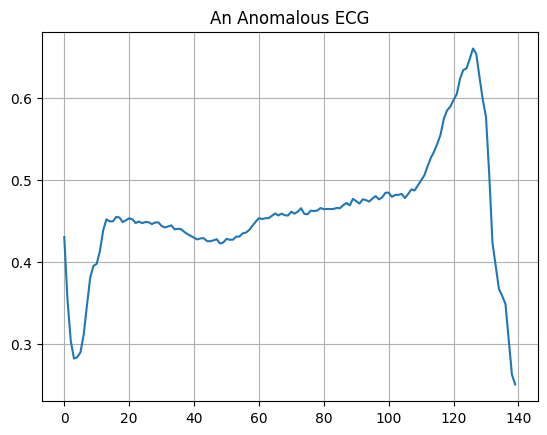

In [ ]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

## ToDo : Construção de um modelo (30pt)

Construa um modelo. Primeiramente tente construir apenas com camadas densas. Depois, tente construir um modelo com camadas de convolução de uma dimensão (Lembre-se que um sinal de ECG é uma série temporal de uma dimensão). [Conv1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D)

In [ ]:
class AnomalyDetector(tf.keras.Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()

        # Encoder
        self.encoder = tf.keras.Sequential([
            layers.Dense(64, activation='relu'),  # Encoder layer with 64 neurons and ReLU activation
            layers.Dense(32, activation='relu'),  # Encoder layer with 32 neurons and ReLU activation
            layers.Dense(16, activation='relu'),  # Encoder layer with 16 neurons and ReLU activation
        ])

        # Decoder
        self.decoder = tf.keras.Sequential([
            layers.Dense(32, activation='relu'),  # Decoder layer with 32 neurons and ReLU activation
            layers.Dense(64, activation='relu'),  # Decoder layer with 64 neurons and ReLU activation
            layers.Dense(140, activation='sigmoid')  # Output layer with 140 neurons and Sigmoid activation
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')

Depois de treinar com os batimentos normais, avalie com os anormais.

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 3s 41ms/step - loss: 0.0603 - val_loss: 0.0538
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0542 - val_loss: 0.0505
Epoch 3/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0481 - val_loss: 0.0476
Epoch 4/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0420 - val_loss: 0.0439
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0370 - val_loss: 0.0417
Epoch 6/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0332 - val_loss: 0.0399
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0303 - val_loss: 0.0388
Epoch 8/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0282 - val_loss: 0.0380
Epoch 9/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0266 - val_loss: 0.0373
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0252 - val_loss: 0.0366
Epoch 11/20
5/5 [================

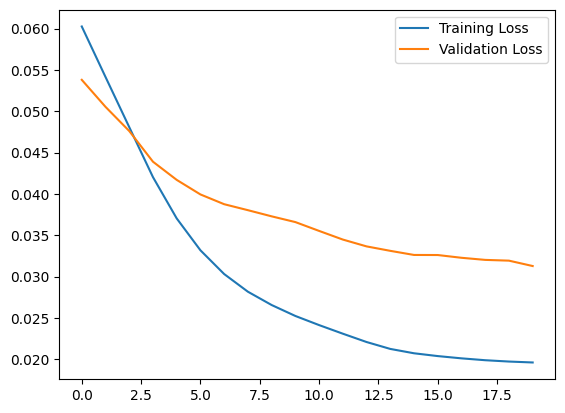

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

Você vai considerar um batimento como anômalo se ele divergir masi que um desvio padrão das amostras normais. Primeiro, vamos plotar um batimento normal a partir da base de treino e sua reconstrução. Assim, poderemos calcular o erro de re-construção.

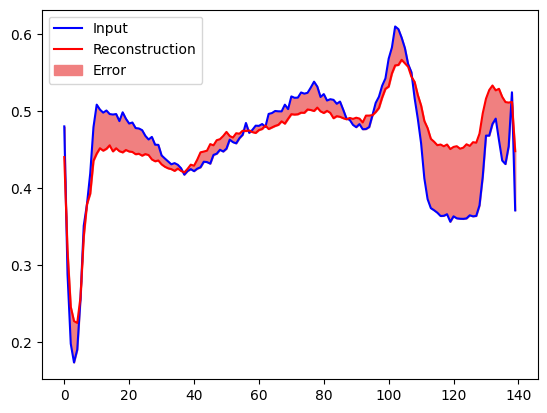

In [ ]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Imagem esperada:

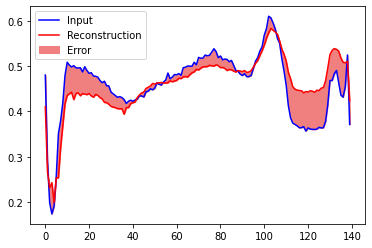



Vamos fazer o mesmo para um batimento anômalo.

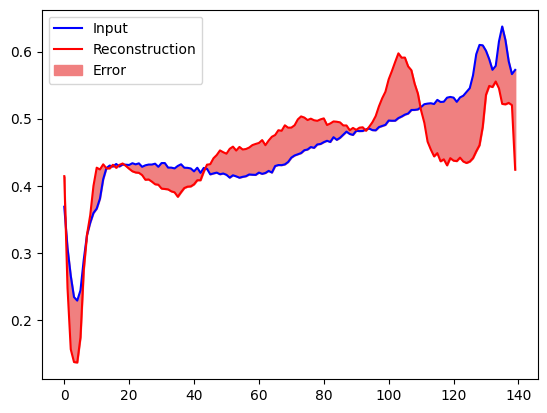

In [ ]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Imagem esperada:

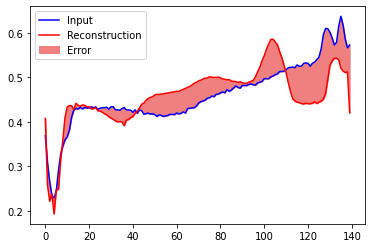

## Detectando as anomalias

Vamos detectar as anomalis se o erro de reconstrução for maior que um limiar. Aqui, vamos calcular o erro médio para os exemp;los normais do treino e depois, classificar os anormais do teste, que tenha erro de reconstrução maior que um desvio padrão.


Plota erro de reconstrução de batimentos normais do treino

74/74 [==============================] - 0s 2ms/step


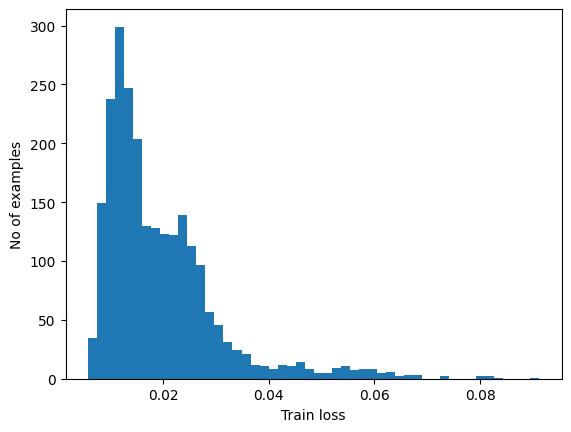

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Escolha do limiar.

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.03062731


14/14 [==============================] - 0s 2ms/step


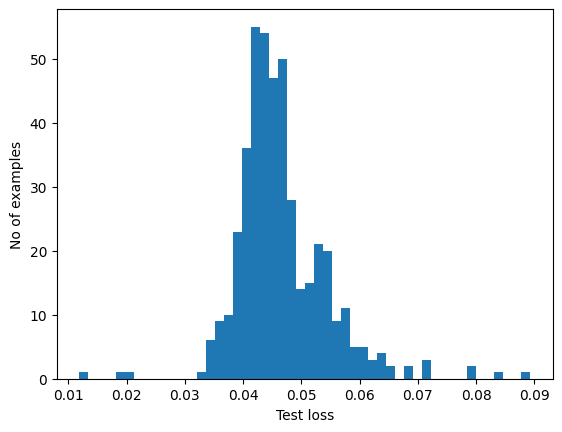

In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Classificação.

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

Calcule a acurácia para os dois modelos (com camadas densas e convolucionais)

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.937
Precision = 0.9940357852882704
Recall = 0.8928571428571429


#Parte III: Redes Generativas Adversariais (40pt)

Leia o tutorial sobre a pix2pix em [Tensofrflow Tutorials](https://www.tensorflow.org/tutorials/generative/pix2pix). O pix2pix foi apresentado em [Image-to-image translation with conditional adversarial networks by Isola et al. (2017)](https://arxiv.org/abs/1611.07004) e se trata de uma rede generativa adversarial condicional para geração de fachadas de prédios condicionada a uma máscara reprtesentando a arquitetura. baixe o noterbook do tutorial, estude e treine a GAN.


Após o treinamento, construa você mesmo 3 máscaras (usando algum software de desenho) e faça uma inferência com a rede. Anexe no notebook a máscara e sua respectiva saída.

## ToDo : Fachadas de prédios (40pt)

In [ ]:
# ToDO : Criar 3 máscaras e gerar 3 saídas com a pix2pix para o problema de fachadas de prédios.

#IMPORTING DATASET
import tensorflow as tf
import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display

#Download the CMP Facade Database data (30MB)
dataset_name = "facades"
_URL = f'http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/{dataset_name}.tar.gz'

path_to_zip = tf.keras.utils.get_file(
    fname=f"{dataset_name}.tar.gz",
    origin=_URL,
    extract=True)

path_to_zip  = pathlib.Path(path_to_zip)
PATH = path_to_zip.parent/dataset_name
list(PATH.parent.iterdir())

Sample shape: (256, 512, 3)
Sample image:


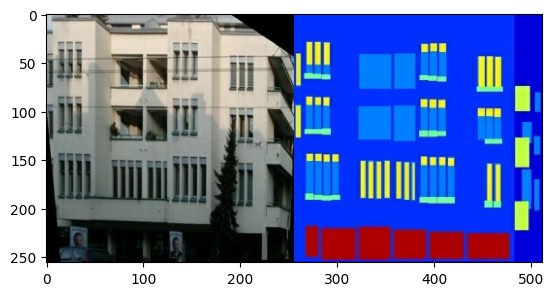

Plotting a sample of input images


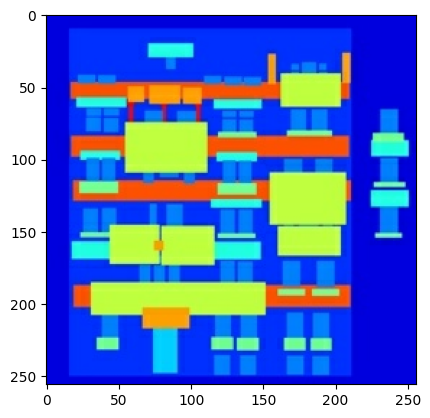

Plotting a sample of real images


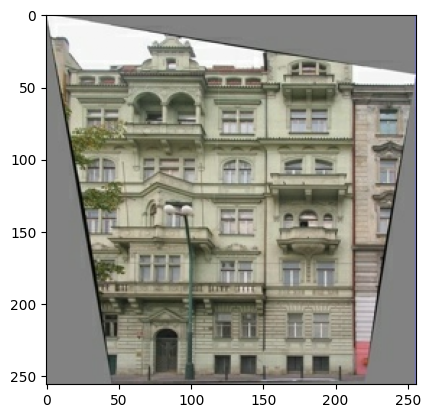

In [ ]:
#LOADING
# Each original image is of size 256 x 512 containing two 256 x 256 images:
sample_image = tf.io.read_file(str(PATH / 'train/1.jpg'))
sample_image = tf.io.decode_jpeg(sample_image)
print("Sample shape:", sample_image.shape)

# Plot the sample image
print("Sample image:")
plt.figure()
plt.imshow(sample_image)
plt.show()

# Define a function that separates real building facade images from the architecture label images; it loads image files and outputs two image tensors
def load(image_file):
    # Read and decode an image file to a uint8 tensor
    image = tf.io.read_file(image_file)
    image = tf.io.decode_jpeg(image)

    # Split each image tensor into two tensors:
    # - one with a real building facade image
    # - one with an architecture label image
    w = tf.shape(image)[1]
    w = w // 2
    input_image = image[:, w:, :]
    real_image = image[:, :w, :]

    # Convert both images to float32 tensors
    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)

    return input_image, real_image

# Plot a sample of the input (architecture label image) and real (building facade photo) images:
print("Plotting a sample of input images")
inp, re = load(str(PATH / 'train/100.jpg'))
plt.figure()
plt.imshow(inp / 255.0)  # Casting to int for matplotlib to display the images
plt.show()

print("Plotting a sample of real images")
plt.figure()
plt.imshow(re / 255.0)
plt.show()


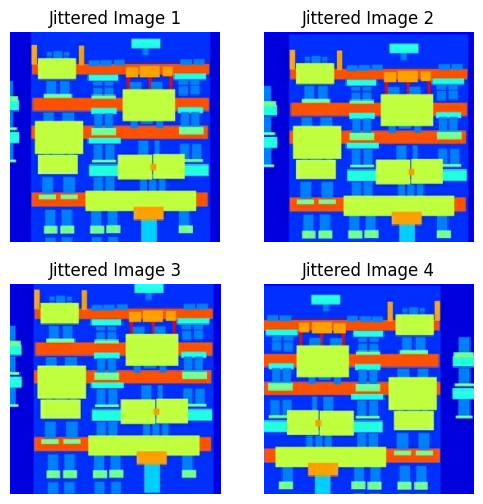

In [ ]:
# PREPROCESSING

# We need to apply random jittering and mirroring to preprocess the training set.
BUFFER_SIZE = 400  # The facade training set consists of 400 images
BATCH_SIZE = 1  # The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
IMG_WIDTH = 256
IMG_HEIGHT = 256

# Resize each 256 x 256 image to a larger height and width—286 x 286.
def resize(input_image, real_image, height, width):
    input_image = tf.image.resize(input_image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    real_image = tf.image.resize(real_image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    return input_image, real_image

# Randomly crop it back to 256 x 256.
def random_crop(input_image, real_image):
    stacked_image = tf.stack([input_image, real_image], axis=0)
    cropped_image = tf.image.random_crop(stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

    return cropped_image[0], cropped_image[1]

# Normalize the images to the [-1, 1] range.
def normalize(input_image, real_image):
    input_image = (input_image / 127.5) - 1
    real_image = (real_image / 127.5) - 1

    return input_image, real_image

@tf.function()
def random_jitter(input_image, real_image):
    # Resizing to 286x286
    input_image, real_image = resize(input_image, real_image, 286, 286)

    # Random cropping back to 256x256
    input_image, real_image = random_crop(input_image, real_image)

    if tf.random.uniform(()) > 0.5:
        # Randomly flip the image horizontally i.e. left to right (random mirroring).
        input_image = tf.image.flip_left_right(input_image)
        real_image = tf.image.flip_left_right(real_image)

    return input_image, real_image

# inspecting output:
plt.figure(figsize=(6, 6))
for i in range(4):
    rj_inp, rj_re = random_jitter(inp, re)
    plt.subplot(2, 2, i + 1)
    plt.imshow(rj_inp / 255.0)
    plt.title(f"Jittered Image {i + 1}")
    plt.axis('off')
plt.show()


In [ ]:
#HELPER FUNCTIONS
def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

def load_image_test(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image, IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

#input pipeline
train_dataset = tf.data.Dataset.list_files(str(PATH / 'train/*.jpg'))
train_dataset = train_dataset.map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

try:
  test_dataset = tf.data.Dataset.list_files(str(PATH / 'test/*.jpg'))
except tf.errors.InvalidArgumentError:
  test_dataset = tf.data.Dataset.list_files(str(PATH / 'val/*.jpg'))

test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

(1, 128, 128, 3)
(1, 256, 256, 3)


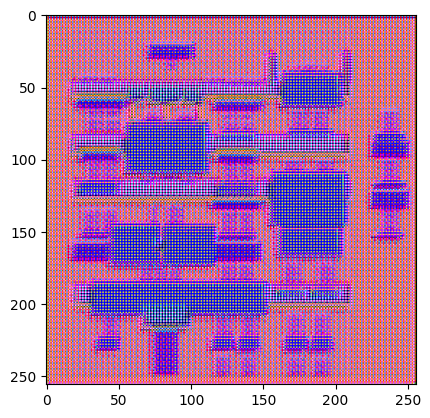

In [ ]:
#GENERATOR
#The generator of your pix2pix cGAN is a modified U-Net. A U-Net consists of an encoder (downsampler) and decoder (upsampler)
##Each block in the encoder is: Convolution -> Batch normalization -> Leaky ReLU
##Each block in the decoder is: Transposed convolution -> Batch normalization -> Dropout (applied to the first 3 blocks) -> ReLU
##There are skip connections between the encoder and decoder (as in the U-Net).

#Encoder:
OUTPUT_CHANNELS = 3
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape)

#Decoder:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                             padding='same',
                                             kernel_initializer=initializer,
                                             use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

#Combine:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

# Visualize and *save to an image file:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64, to_file='generator_model.png')
#*The visualization is not working properly, without explanation or error messages, so this is a work-around

#Test:
gen_output = generator(inp[tf.newaxis, ...], training=False)
# Rescale the generated image from [-1, 1] to [0, 1]
gen_output_rescaled = (gen_output[0, ...] + 1) / 2

plt.imshow(gen_output_rescaled)
plt.show()
#following call (defined in tutorial) causes warning for exceding range
#plt.imshow(gen_output[0, ...])

In [ ]:
#LOSS (I Ii II I_)

#cGANs learn a structured loss that penalizes a possible structure that differs from the network output and the target image
##The generator loss is a sigmoid cross-entropy loss of the generated images and an array of ones.
##The pix2pix paper also mentions the L1 loss, which is a MAE (mean absolute error) between the generated image and the target image.
##This allows the generated image to become structurally similar to the target image.
##The formula to calculate the total generator loss is gan_loss + LAMBDA * l1_loss, where LAMBDA = 100. This value was decided by the authors of the paper.

LAMBDA = 100
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

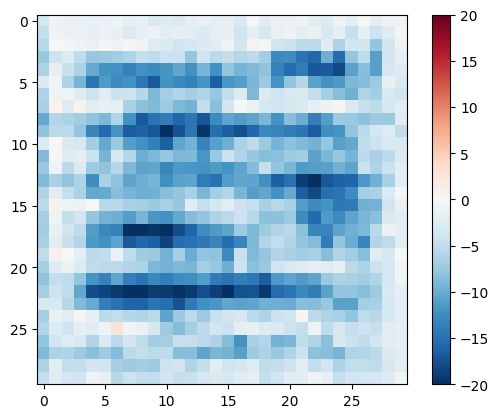

In [ ]:
#DISCRIMINATOR

#The discriminator in the pix2pix cGAN is a convolutional PatchGAN classifier—it tries to classify if each image patch is real or not real, as described in the pix2pix paper.
##Each block in the discriminator is: Convolution -> Batch normalization -> Leaky ReLU.
##The shape of the output after the last layer is (batch_size, 30, 30, 1).
##Each 30 x 30 image patch of the output classifies a 70 x 70 portion of the input image.
##The discriminator receives 2 inputs:
###The input image and the target image, which it should classify as real.
###The input image and the generated image (the output of the generator), which it should classify as fake.
###Use tf.concat([inp, tar], axis=-1) to concatenate these 2 inputs together.

def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

#Visualize:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64, to_file='discriminator_model.png') #also applying work-around here

#Test:
disc_out = discriminator([inp[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()


In [ ]:
#DISCRIMINATOR LOSS (I Ii II I_)
#The discriminator_loss function takes 2 inputs: real images and generated images.
#real_loss is a sigmoid cross-entropy loss of the real images and an array of ones(since these are the real images).
#generated_loss is a sigmoid cross-entropy loss of the generated images and an array of zeros (since these are the fake images).
#The total_loss is the sum of real_loss and generated_loss.

def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [ ]:
#OPTIMIZERS & CHECKPOINT
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

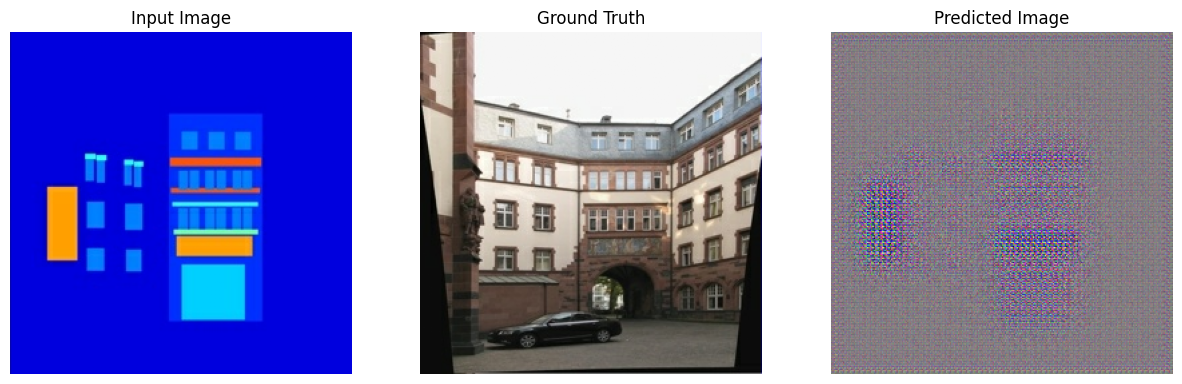

In [ ]:
#GENERATING IMAGES
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

#Test:
for example_input, example_target in test_dataset.take(1): generate_images(generator, example_input, example_target)

Time taken for 1000 steps: 96.18 sec



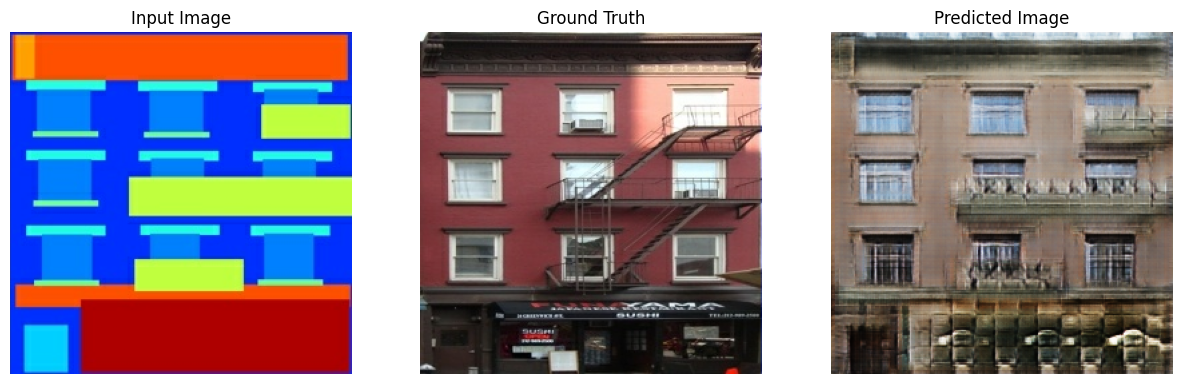

Step: 39k
....................................................................................................

In [ ]:
#TRAINING

#For each example input generates an output.
#The discriminator receives the input_image and the generated image as the first input. The second input is the input_image and the target_image.
#Next, calculate the generator and the discriminator loss.
#Then, calculate the gradients of loss with respect to both the generator and the discriminator variables(inputs) and apply those to the optimizer.
#Finally, log the losses to TensorBoard.

log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

@tf.function
def train_step(input_image, target, step):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
    tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

#Training loop (setup to work in steps instead of epochs):
def fit(train_ds, test_ds, steps):
  example_input, example_target = next(iter(test_ds.take(1)))
  start = time.time()

  for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
    if (step) % 1000 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input, example_target)
      print(f"Step: {step//1000}k")

    train_step(input_image, target, step)

    # Training step
    if (step+1) % 10 == 0:
      print('.', end='', flush=True)


    # Save (checkpoint) the model every 5k steps
    if (step + 1) % 5000 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

#*This training loop saves logs that you can view in TensorBoard to monitor the training progress.
#*in a notebook, launch the viewer before starting the training to monitor with TensorBoard.
#%load_ext tensorboard
#%tensorboard --logdir {log_dir}

#Run training loop:
fit(train_dataset, test_dataset, steps=40000)


In [ ]:
#Restore the latest checkpoint and test the network
%ls {checkpoint_dir}

# Restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

checkpoint                  ckpt-3.index                ckpt-6.index
ckpt-1.data-00000-of-00001  ckpt-4.data-00000-of-00001  ckpt-7.data-00000-of-00001
ckpt-1.index                ckpt-4.index                ckpt-7.index
ckpt-2.data-00000-of-00001  ckpt-5.data-00000-of-00001  ckpt-8.data-00000-of-00001
ckpt-2.index                ckpt-5.index                ckpt-8.index
ckpt-3.data-00000-of-00001  ckpt-6.data-00000-of-00001


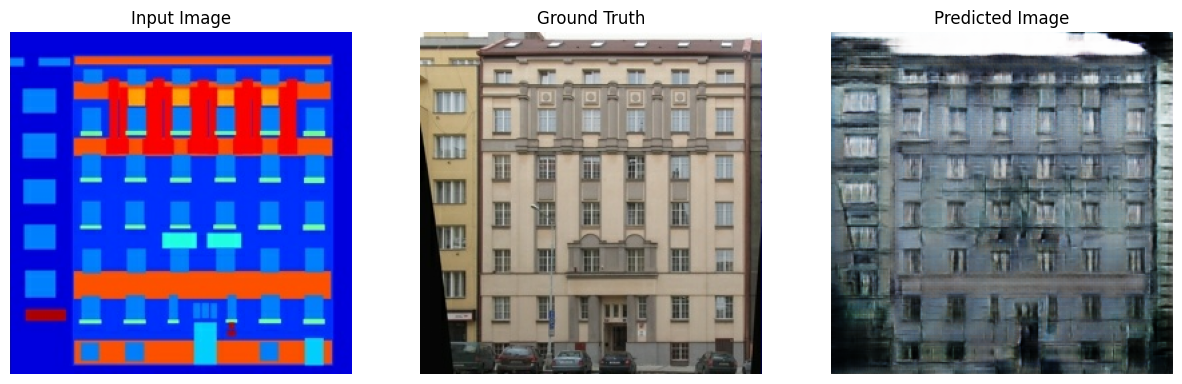

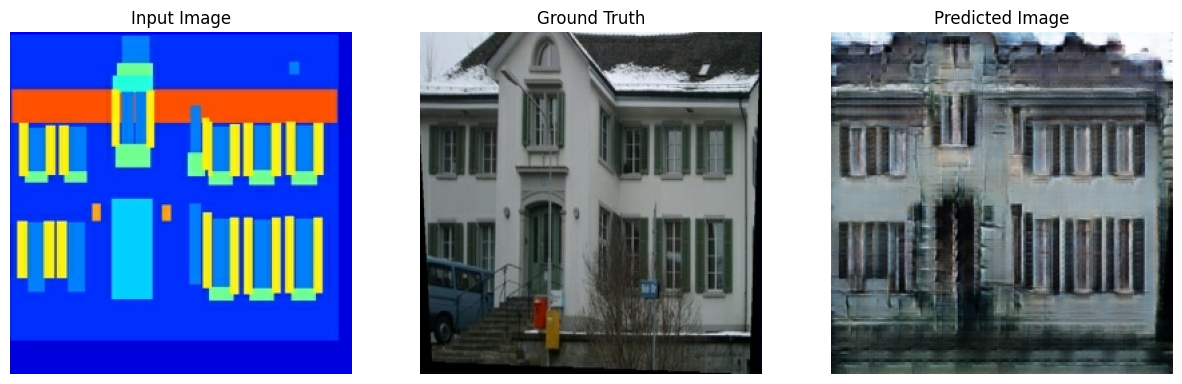

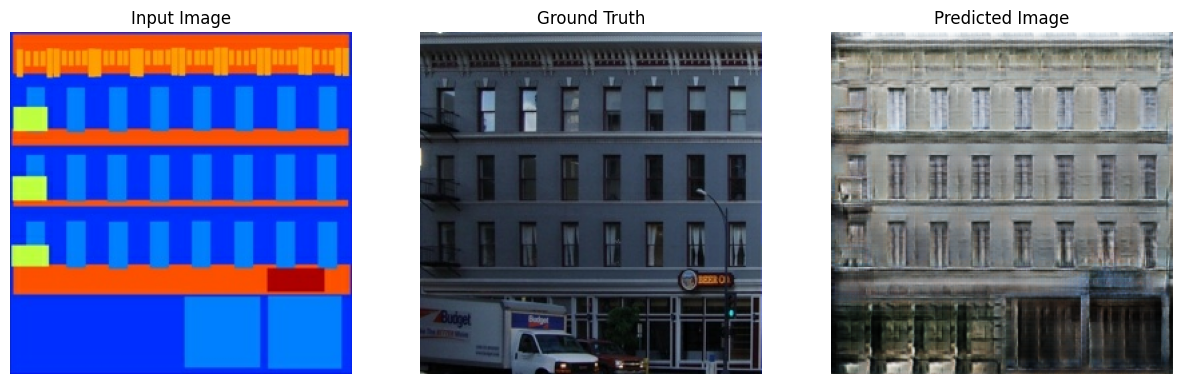

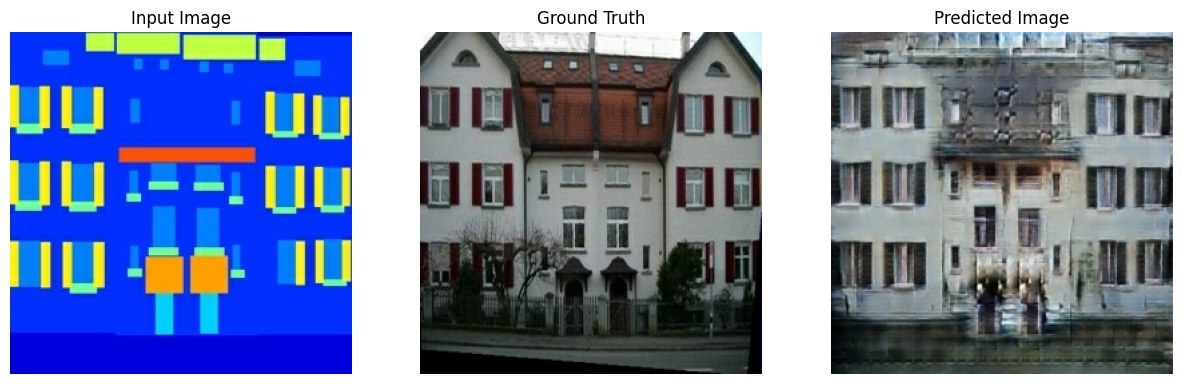

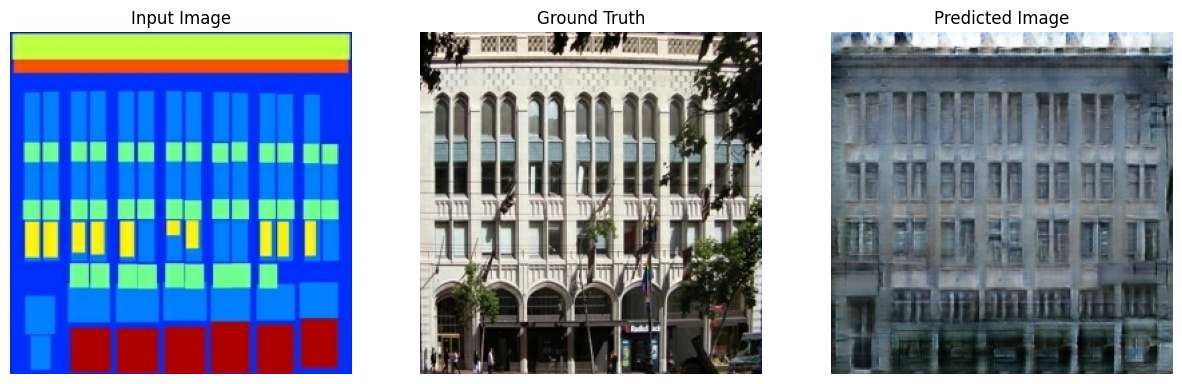

In [ ]:
#Generate some images using the test set
# Run the trained model on a few examples from the test set
for inp, tar in test_dataset.take(5):
  generate_images(generator, inp, tar)

In [ ]:
#Loading 3 original masks
#Making an inference on said masks

# Importando as bibliotecas necessárias
from google.colab import files
from PIL import Image
import numpy as np

# Carregar as máscaras para o notebook
uploaded = files.upload()

# Listar os arquivos carregados
image_files = list(uploaded.keys())

# Exibir as imagens carregadas
original_masks = []
for image_file in image_files:
    img = Image.open(image_file)
    original_masks.append(img)

Saving 1.jpg to 1 (6).jpg
Saving 2.jpg to 2 (6).jpg
Saving 3.jpg to 3 (6).jpg


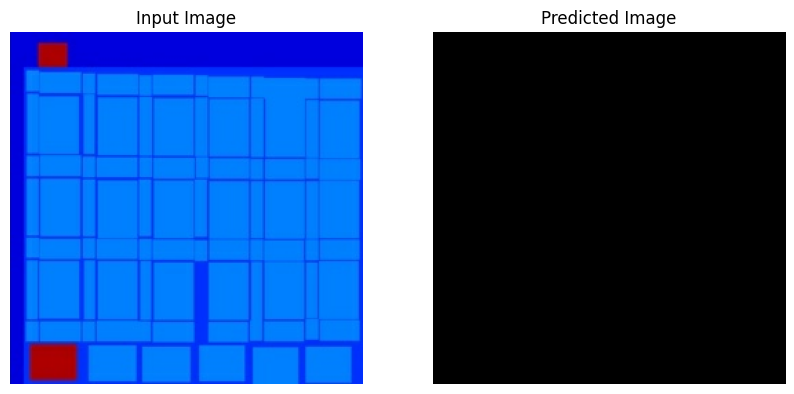

In [ ]:
def generate_images_from_input(model, test_input):
    # Generate prediction using the trained generator
    prediction = model(test_input, training=False)

    # Plot the input image and the predicted image
    plt.figure(figsize=(10, 10))
    display_list = [test_input[0], prediction[0]]
    title = ['Input Image', 'Predicted Image']

    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')

    plt.show()

# Example of generating images from input masks
for example_input, _ in test_dataset.take(1):
    generate_images_from_input(generator, example_input)


Baseado nos exemplos do tensorflow [tutorials](https://www.tensorflow.org/tutorials)
